<a href="https://colab.research.google.com/github/moodv/data-analytics-portfolio/blob/main/Project2-online-retail/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:



df = pd.read_excel('OnlineRetail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe(include="all")
df.isnull().sum()
df.duplicated().sum()

print(f"Nulls: {df.isnull().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")


Nulls: InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133582
Country             0
TotalPrice          0
Year                0
Month               0
Day                 0
Weekday             0
Time                0
Hour                0
dtype: int64
Duplicates: 0


In [ ]:
# 1. Standardize text columns
df['Description'] = df['Description'].str.lower()
df['Country'] = df['Country'].str.lower()

# 2. Drop nulls in Description
df = df.dropna(subset=['Description'])

# 3. Drop exact duplicate rows
df = df.drop_duplicates()

# 4. Add TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 5. Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 6. Extract date features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Weekday'] = df['InvoiceDate'].dt.day_name()
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour




In [ ]:
df.info()
df.head()
print(f"Nulls: {nulls}")
print(f"Duplicates: {duplicate}")

<class 'pandas.core.frame.DataFrame'>
Index: 535186 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535186 non-null  object        
 1   StockCode    535186 non-null  object        
 2   Description  535186 non-null  object        
 3   Quantity     535186 non-null  int64         
 4   InvoiceDate  535186 non-null  datetime64[ns]
 5   UnitPrice    535186 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535186 non-null  object        
 8   TotalPrice   535186 non-null  float64       
 9   Year         535186 non-null  int32         
 10  Month        535186 non-null  int32         
 11  Day          535186 non-null  int32         
 12  Weekday      535186 non-null  object        
 13  Time         535186 non-null  object        
 14  Hour         535186 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32

In [13]:
# Cell 3 — dataset overview for the reader
print("Rows, columns:", df.shape)
print("\nDtypes and null counts:")
display(df.info())
print("\nMissing counts summary:")
display(df.isnull().sum().sort_values(ascending=False).head(20))

print("\nTime span:")
print("min InvoiceDate:", df['InvoiceDate'].min())
print("max InvoiceDate:", df['InvoiceDate'].max())


Rows, columns: (535186, 15)

Dtypes and null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 535186 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535186 non-null  object        
 1   StockCode    535186 non-null  object        
 2   Description  535186 non-null  object        
 3   Quantity     535186 non-null  int64         
 4   InvoiceDate  535186 non-null  datetime64[ns]
 5   UnitPrice    535186 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      535186 non-null  object        
 8   TotalPrice   535186 non-null  float64       
 9   Year         535186 non-null  int32         
 10  Month        535186 non-null  int32         
 11  Day          535186 non-null  int32         
 12  Weekday      535186 non-null  object        
 13  Time         535186 non-null  object        
 14  Hour         535186 non-null  int32 

None


Missing counts summary:


,0
CustomerID,133582
StockCode,0
InvoiceNo,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
TotalPrice,0
Year,0



Time span:
min InvoiceDate: 2010-12-01 08:26:00
max InvoiceDate: 2011-12-09 12:50:00


In [16]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (10,5)

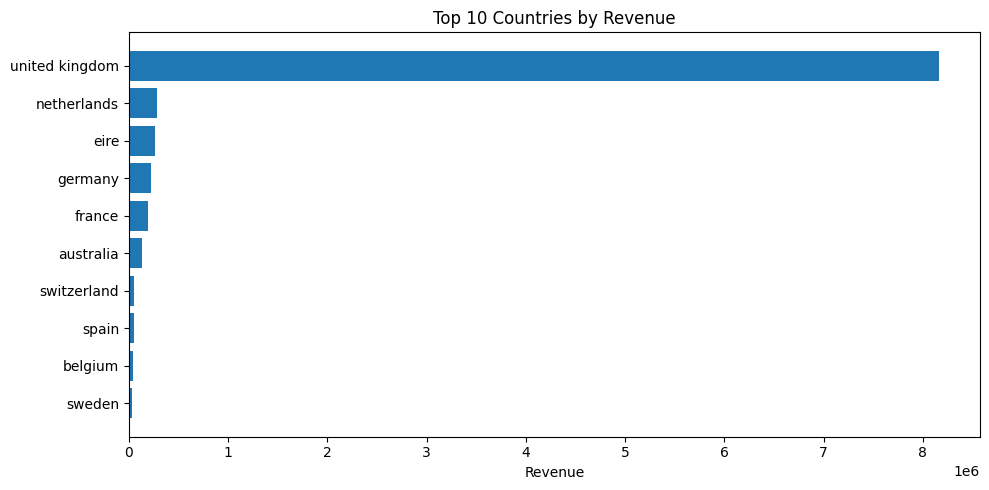

,TotalPrice
Country,
united kingdom,8167128.184
netherlands,284661.540
eire,262993.380
germany,221509.470
france,197317.110
australia,137009.770
switzerland,56363.050
spain,54756.030
belgium,40910.960


Top country contribution: 83.97% of total revenue
Other countries (beyond top 10): 2.74% of total revenue


In [28]:
# Geography analysis — top countries by revenue
countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Top 10 countries
top_countries = countries.head(10)
plt.figure()
plt.barh(top_countries.index[::-1], top_countries.values[::-1])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

display(top_countries)

# % of revenue from top country vs rest
top_share = countries.iloc[0] / countries.sum() * 100
print(f"Top country contribution: {top_share:.2f}% of total revenue")

# Long tail check
other_share = countries.iloc[10:].sum() / countries.sum() * 100
print(f"Other countries (beyond top 10): {other_share:.2f}% of total revenue")


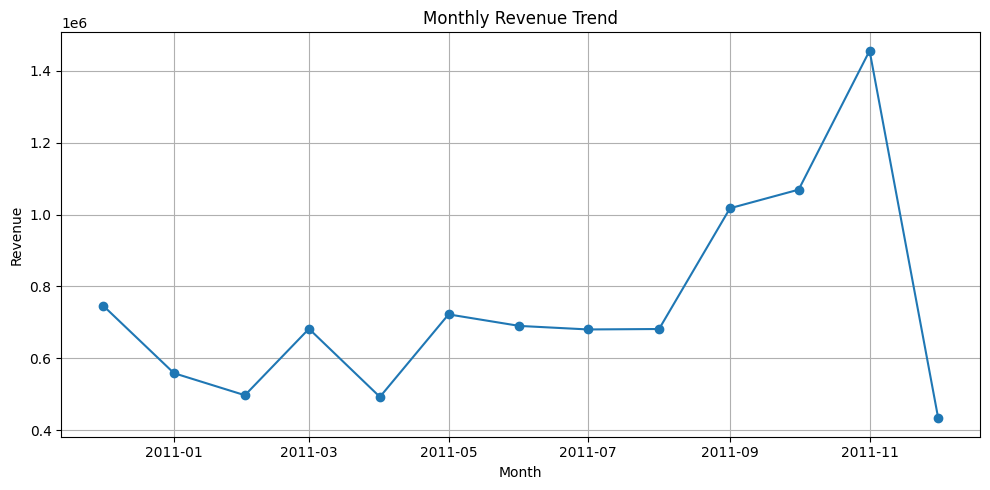

,month,revenue
0,2010-12-01,746723.610
1,2011-01-01,558448.560
2,2011-02-01,497026.410
3,2011-03-01,682013.980
4,2011-04-01,492367.841
5,2011-05-01,722094.100
6,2011-06-01,689977.230
7,2011-07-01,680156.991
8,2011-08-01,681386.460
9,2011-09-01,1017596.682


In [17]:
# monthly revenue trend (big picture)
monthly = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum().sort_index()
monthly.index = monthly.index.to_timestamp()
plt.figure()
plt.plot(monthly.index, monthly.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# also show the table
display(monthly.reset_index().rename(columns={'InvoiceDate':'month','TotalPrice':'revenue'}).head(12))


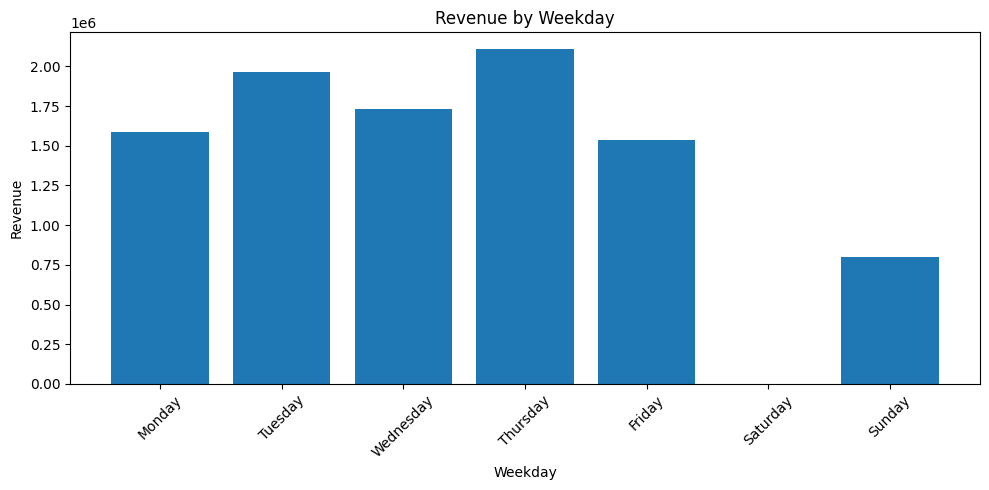

,Weekday,revenue
0,Monday,1584895.301
1,Tuesday,1965703.611
2,Wednesday,1730088.430
3,Thursday,2108701.530
4,Friday,1537958.621
5,Saturday,NaN
6,Sunday,798659.461


In [18]:
# Cell 5 — weekday totals (Mon..Sun)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday = df.groupby('Weekday')['TotalPrice'].sum().reindex(weekday_order)
plt.figure()
plt.bar(weekday.index, weekday.values)
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
display(weekday.reset_index().rename(columns={'TotalPrice':'revenue'}))


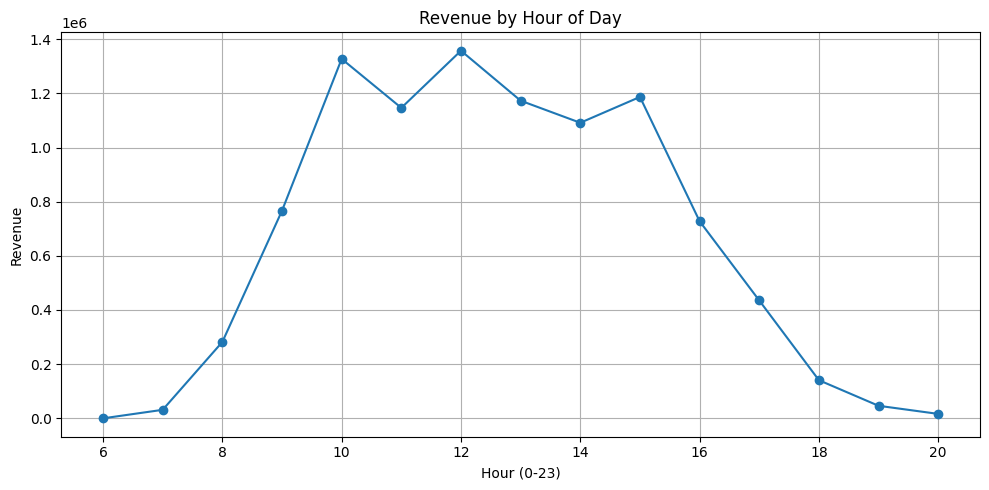

,Hour,revenue
0,6,-497.350
1,7,31009.320
2,8,281723.020
3,9,766524.171
4,10,1327329.891
5,11,1146457.490
6,12,1357595.120
7,13,1172985.870
8,14,1091408.741
9,15,1186819.410


In [19]:
# Cell 6 — hourly revenue pattern
hour = df.groupby('Hour')['TotalPrice'].sum().sort_index()
plt.figure()
plt.plot(hour.index, hour.values, marker='o')
plt.title("Revenue by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
display(hour.reset_index().rename(columns={'TotalPrice':'revenue'}))


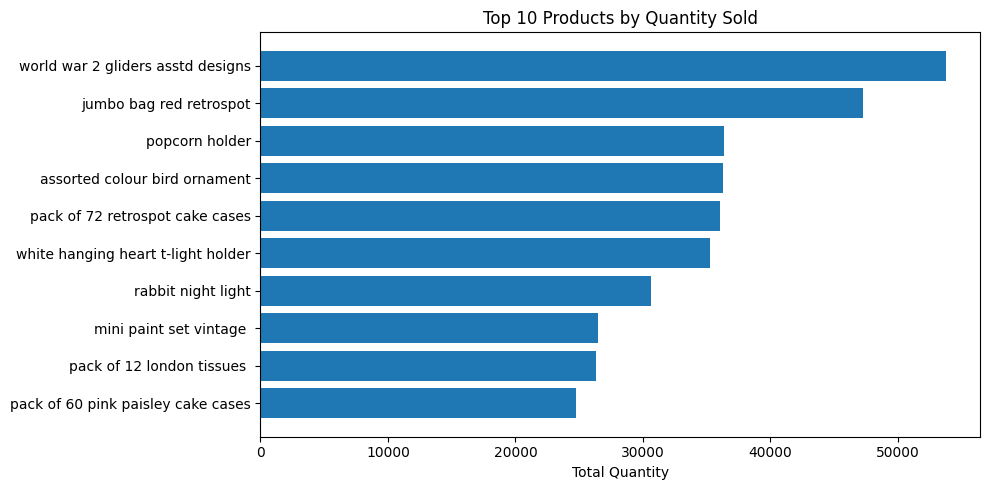

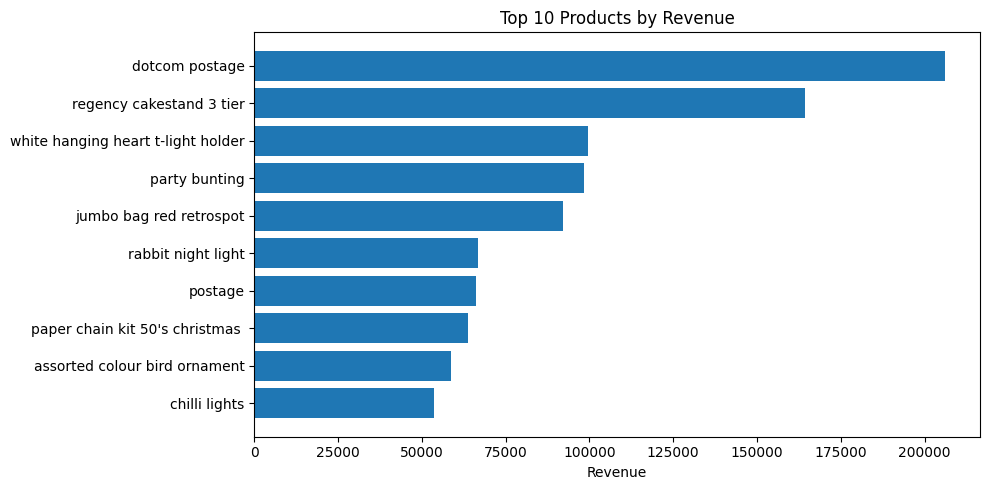

,top_qty,top_rev
Description,,
assorted colour bird ornament,36282.0,58792.42
chilli lights,,53746.66
dotcom postage,,206245.48
jumbo bag red retrospot,47260.0,92175.79
mini paint set vintage,26437.0,
pack of 12 london tissues,26299.0,
pack of 60 pink paisley cake cases,24719.0,
pack of 72 retrospot cake cases,36016.0,
paper chain kit 50's christmas,,63715.24


In [20]:
# Cell 8 — top products by quantity and revenue
top_qty = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_rev = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure()
plt.barh(top_qty.index[::-1], top_qty.values[::-1])
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity")
plt.tight_layout()
plt.show()

plt.figure()
plt.barh(top_rev.index[::-1], top_rev.values[::-1])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.tight_layout()
plt.show()

display(pd.DataFrame({'top_qty': top_qty, 'top_rev': top_rev}).fillna(''))


Number of return rows: 9724


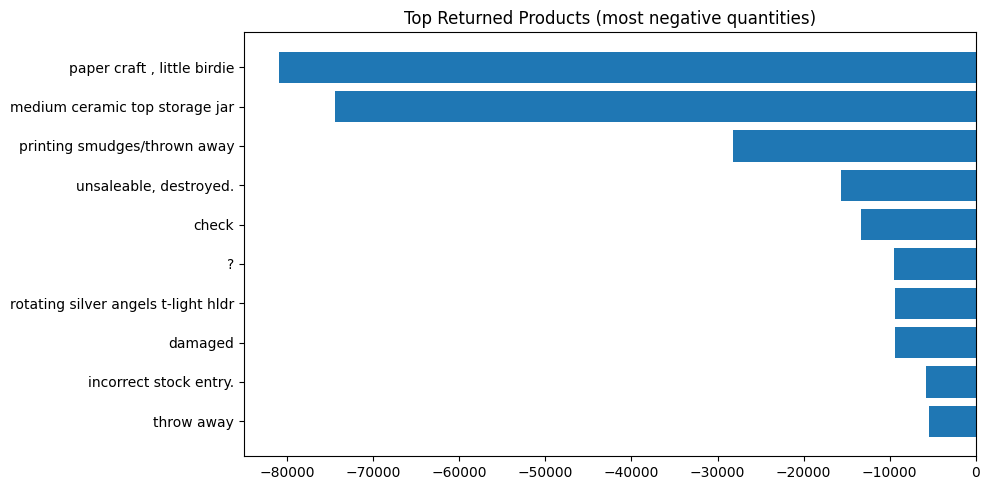

,Quantity
Description,
"paper craft , little birdie",-80995
medium ceramic top storage jar,-74494
printing smudges/thrown away,-28258
"unsaleable, destroyed.",-15644
check,-13381
?,-9496
rotating silver angels t-light hldr,-9376
damaged,-9365
incorrect stock entry.,-5760


In [21]:
# Cell 9 — returns: negative quantity indicates cancellations/returns
returns = df[df['Quantity'] < 0]
print("Number of return rows:", returns.shape[0])
if returns.shape[0] > 0:
    returns_by_product = returns.groupby('Description')['Quantity'].sum().sort_values().head(10)
    plt.figure()
    plt.barh(returns_by_product.index[::-1], returns_by_product.values[::-1])
    plt.title("Top Returned Products (most negative quantities)")
    plt.tight_layout()
    plt.show()
    display(returns_by_product)
else:
    print("No negative-quantity rows (returns) found.")


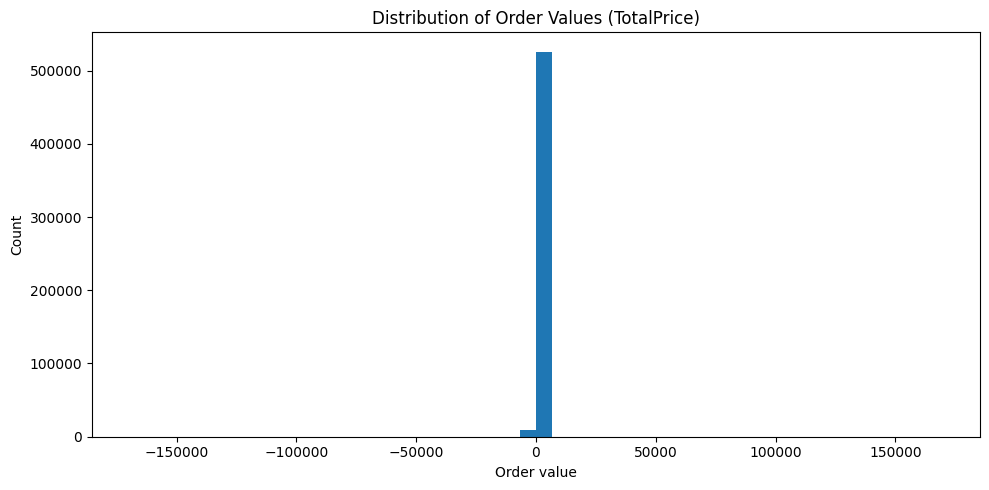

,TotalPrice
count,535186.00
mean,18.17
std,381.17
min,-168469.60
25%,3.75
50%,9.90
75%,17.40
90%,31.80
95%,59.40
max,168469.60


In [22]:
# Cell 10 — order value distribution
plt.figure()
plt.hist(df['TotalPrice'], bins=50)
plt.title("Distribution of Order Values (TotalPrice)")
plt.xlabel("Order value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# show some percentiles
display(df['TotalPrice'].describe(percentiles=[.25,.5,.75,.9,.95]).round(2))


In [23]:
# Cell 11 — average basket size (items per invoice)
basket = df.groupby('InvoiceNo').agg({'Quantity':'sum', 'TotalPrice':'sum'})
avg_items = basket['Quantity'].mean()
avg_order_value = basket['TotalPrice'].mean()
print(f"Avg items per invoice: {avg_items:.2f}")
print(f"Avg order value: {avg_order_value:.2f}")

# Top big baskets
display(basket.sort_values('TotalPrice', ascending=False).head(10))


Avg items per invoice: 211.76
Avg order value: 397.87


,Quantity,TotalPrice
InvoiceNo,,
581483,80995,168469.60
541431,74215,77183.60
574941,14149,52940.94
576365,13956,50653.91
556444,60,38970.00
567423,12572,31698.16
556917,15049,22775.93
572209,1920,22206.00
567381,6760,22104.80


In [24]:
# Cell 12 — Pareto for customers (drop null CustomerID)
df_cust = df.dropna(subset=['CustomerID']).copy()
cust_rev = df_cust.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)
cust_cum = cust_rev.cumsum() / cust_rev.sum()
top_pct = (cust_cum <= 0.8).sum() / cust_rev.shape[0] * 100

print(f"Customers contributing to first 80% revenue: { (cust_cum <= 0.8).sum() } customers ({top_pct:.2f}% of customers)")
display(cust_rev.head(10))


Customers contributing to first 80% revenue: 1166 customers (26.67% of customers)


,TotalPrice
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187322.17
14911.0,132458.73
12415.0,123725.45
14156.0,113214.59
17511.0,88125.38
16684.0,65892.08
13694.0,62690.54


In [25]:
# Cell 13 — prepare minimal RFM dataset (only if doing RFM)
# Use df_cust (CustomerID not null)
# Recency measured relative to max InvoiceDate in dataset
import datetime as dt
ref_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df_cust.groupby('CustomerID').agg(
    recency = ('InvoiceDate', lambda x: (ref_date - x.max()).days),
    frequency = ('InvoiceNo', 'nunique'),
    monetary = ('TotalPrice', 'sum')
).reset_index()

display(rfm.head())


,CustomerID,recency,frequency,monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [26]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Weekday,Time,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom,15.30,2010,12,1,Wednesday,08:26:00,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom,22.00,2010,12,1,Wednesday,08:26:00,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,france,10.20,2011,12,9,Friday,12:50:00,12
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,france,12.60,2011,12,9,Friday,12:50:00,12
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011,12,9,Friday,12:50:00,12
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011,12,9,Friday,12:50:00,12


In [27]:
df_cust

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Weekday,Time,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,united kingdom,15.30,2010,12,1,Wednesday,08:26:00,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,united kingdom,22.00,2010,12,1,Wednesday,08:26:00,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,united kingdom,20.34,2010,12,1,Wednesday,08:26:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,france,10.20,2011,12,9,Friday,12:50:00,12
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,france,12.60,2011,12,9,Friday,12:50:00,12
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011,12,9,Friday,12:50:00,12
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,france,16.60,2011,12,9,Friday,12:50:00,12
